# Drei Messreihen - Drei Verteilungen

Drei Experimente wurden durchgeführt, zu denen jeweils eine Messreihe mit repräsentativen Werten vorliegt.

Im ersten Experiment wurde die Beschleunigung eines Sensors im Ruhezustand gemessen. 

Im zweiten Experiment wurde der Ausschlagwinkel eines ballistischen Pendels mit einem digitalen Winkelencoder mit einer Auflösung von 0,01 Grad erfasst. 

Das dritte Experiment kombiniert die Signale von zwei digitalen Sensoren mit gleicher Auflösung von 0,01. 

In allen drei Fällen sollen die jeweiligen Messwerte statistisch ausgewertet werden. Dazu sind für jede Messreihe der Mittelwert, die Standardabweichung sowie die Standard- und erweiterte Messunsicherheit zu bestimmen.
Anschließend sind die resultierenden Wahrscheinlichkeitsverteilungen grafisch darzustellen, der Mittelwert und die Grenzen der ±1σ-Streuung im Diagramm zu markieren und die Ergebnisse physikalisch zu interpretieren.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform, triang


## Histogram-Darstellung

Lesen Sie die Messdaten ein und erstellen Sie für alle drei Datensätze Histogramme der Messwerte um die zugrundeliegende Verteilung zu visualisieren.

In [31]:
# --------------------------------------------
# 1. Messdaten einladen
# --------------------------------------------
# CSV-Dateien laden
data_normal = np.loadtxt("1_beschleunigungsmessung.csv", delimiter=",")
data_rect   = np.loadtxt("2_pendelausschlag.csv", delimiter=",")
data_tri    = np.loadtxt("3_zweiDigitalsensoren.csv", delimiter=",")

print("Datensätze wurden eingelesen.\n")

Datensätze wurden eingelesen.



Alternativ können Sie sich auch direkt in Python die Messdaten generieren:

In [32]:
# --------------------------------------------
# 1. Datengenerierung
# --------------------------------------------
np.random.seed(42)  # für reproduzierbare Ergebnisse

# (A) 
data_normal = np.random.normal(loc=0.0, scale=0.02, size=1200)

# (B) 
delta = 1.0    # maximaler Messbereich um den wahren Wert (±0.25°)
true_angle = 12.3
resolution = 0.01  # Encoder-Auflösung in Grad

# Erzeuge gleichverteilte Zufallswerte innerhalb ±delta/2 um true_angle
data_rect = true_angle + (np.random.rand(1200) - 0.5) * delta

# Quantisierung auf 0.1°-Schritte entsprechend der Encoderauflösung
data_rect = np.round(data_rect / resolution) * resolution

# (C)
data_rect2 = 0.5*true_angle + (np.random.rand(1200) - 0.5) * delta 
u1 = data_rect
u2 = np.round(data_rect2 / resolution) * resolution
data_tri = 0.5*(u1 + u2)

# Speicherung der Datensätze (optional)
np.savetxt("1_beschleunigungsmessung.csv", data_normal, delimiter=",")
np.savetxt("2_pendelausschlag.csv", data_rect, delimiter=",")
np.savetxt("3_zweiDigitalsensoren.csv", data_tri, delimiter=",")

print("Datensätze wurden erzeugt und gespeichert.\n")

Datensätze wurden erzeugt und gespeichert.



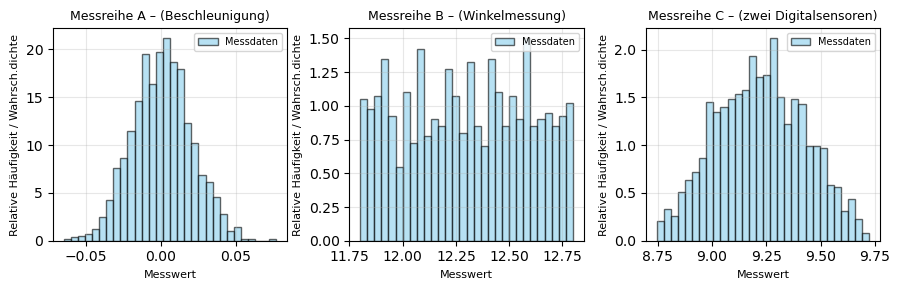

In [33]:
# --------------------------------------------------------------
# 2. Visualisierung
# --------------------------------------------------------------

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharey=False)

datasets = [
    (data_normal, "Messreihe A – (Beschleunigung)"),
    (data_rect,   "Messreihe B – (Winkelmessung)"),
    (data_tri,    "Messreihe C – (zwei Digitalsensoren)"),
]

for ax, (data, title) in zip(axes, datasets):
    # Histogramm plotten
    counts, bins, _ = ax.hist(
        data,
        bins=30,
        density=True,
        color="skyblue",
        edgecolor="black",
        alpha=0.6,
        label="Messdaten"
    )
    
    # Achsenbeschriftungen und Titel
    ax.set_title(title, fontsize=9)
    ax.set_xlabel("Messwert", fontsize=8)
    ax.set_ylabel("Relative Häufigkeit / Wahrsch.dichte", fontsize=8)
    ax.grid(alpha=0.3)
    ax.legend(fontsize=7)

# Gesamtlayout optimieren
plt.tight_layout()
plt.show()

Sollten Sie sich unsicher sein, welche Verteilung vorliegt, kann man in Python schnell mittels Shapiro–Wilk-Tests überprüfen, ob eine Stichprobe normalverteilt ist.
Er testet ausschließlich auf Normalverteilung und wird häufig als Standardverfahren zur Beurteilung der Verteilungsannahme verwendet.
Die Nullhypothese $H_0$ lautet dabei, dass die vorliegenden Daten normalverteilt sind.

Als Entscheidungsregel gilt:
Liegt der berechnete p-Wert unter 0,05, wird die Nullhypothese verworfen.
Dies bedeutet, dass die Daten signifikant von einer Normalverteilung abweichen.

Wird der Test nicht bestanden, ist es wahrscheinlich, dass die Daten einer anderen Verteilungsform, beispielsweise einer Dreiecksverteilung oder einer anderen nicht-normalen Verteilung, folgen.

In [34]:
from scipy.stats import shapiro

print('---- Messreihe 1 --------------------------------')
stat, p = shapiro(data_normal)
print(f"Shapiro–Wilk-Test: Statistik={stat:.4f}, p={p:.4f}")
if p > 0.05:
    print("→ Daten sind vereinbar mit Normalverteilung.\n")
else:
    print("→ Daten weichen signifikant von Normalverteilung ab.\n")


print('---- Messreihe 2 --------------------------------')
stat, p = shapiro(data_rect)
print(f"Shapiro–Wilk-Test: Statistik={stat:.4f}, p={p:.4f}")
if p > 0.05:
    print("→ Daten sind vereinbar mit Normalverteilung.\n")
else:
    print("→ Daten weichen signifikant von Normalverteilung ab.\n")

print('---- Messreihe 3 --------------------------------')
stat, p = shapiro(data_tri)
print(f"Shapiro–Wilk-Test: Statistik={stat:.4f}, p={p:.4f}")
if p > 0.05:
    print("→ Daten sind vereinbar mit Normalverteilung.\n")
else:
    print("→ Daten weichen signifikant von Normalverteilung ab.\n")

---- Messreihe 1 --------------------------------
Shapiro–Wilk-Test: Statistik=0.9992, p=0.8946
→ Daten sind vereinbar mit Normalverteilung.

---- Messreihe 2 --------------------------------
Shapiro–Wilk-Test: Statistik=0.9555, p=0.0000
→ Daten weichen signifikant von Normalverteilung ab.

---- Messreihe 3 --------------------------------
Shapiro–Wilk-Test: Statistik=0.9923, p=0.0000
→ Daten weichen signifikant von Normalverteilung ab.



Neben dem Shapiro–Wilk-Test, der ausschließlich auf Normalverteilung prüft, existieren auch weitere statistische Verfahren, mit denen Daten auf andere Verteilungsformen getestet werden können.
Für die vorliegende Aufgabenstellung ist es jedoch ausreichend, zwischen einer Normalverteilung und einer Dreiecksverteilung sicher unterscheiden zu können, da diese beiden Verteilungen die charakteristischen Grenzfälle der betrachteten Messsituationen darstellen. Den einzelnen Messreihen können also folgende Verteilungen zugeordnet werden:

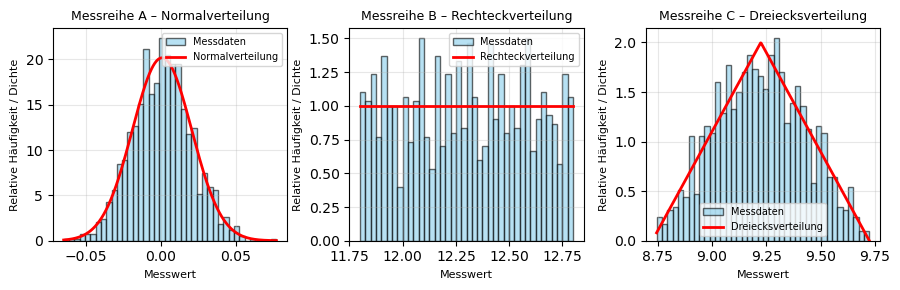

In [35]:
# --------------------------------------------------------------
# 2. Visualisierung mit Theorie
# --------------------------------------------------------------
datasets = [
    (data_normal, "Messreihe A – Normalverteilung"),
    (data_rect,   "Messreihe B – Rechteckverteilung"),
    (data_tri,    "Messreihe C – Dreiecksverteilung"),
]

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharey=False)

for ax, (data, title) in zip(axes, datasets):
    # Histogramm der Messdaten
    counts, bins, _ = ax.hist(
        data,
        bins=40,
        density=True,
        color="skyblue",
        edgecolor="black",
        alpha=0.6,
        label="Messdaten"
    )
    
    # x-Achse für theoretische Dichte
    x = np.linspace(min(data), max(data), 400)
    
    # Theoretische Verteilungen
    if "Normal" in title:
        pdf = norm.pdf(x, loc=np.mean(data), scale=np.std(data, ddof=1))
        ax.plot(x, pdf, "r-", lw=2, label="Normalverteilung")
    
    elif "Rechteck" in title:
        a = true_angle - delta/2
        b = true_angle + delta/2
        pdf = uniform.pdf(x, loc=a, scale=(b - a))
        ax.plot(x, pdf, "r-", lw=2, label="Rechteckverteilung")
    
    elif "Dreiecks" in title:
        a = 0.5*(true_angle+0.5*true_angle) - delta/2
        b = 0.5*(true_angle+0.5*true_angle) + delta/2
        c = 0.5  # Symmetrische Dreiecksverteilung
        pdf = triang.pdf((x - a) / (b - a), c) / (b - a)
        ax.plot(x, pdf, "r-", lw=2, label="Dreiecksverteilung")
    
    # Layout & Beschriftung
    ax.set_title(title, fontsize=9)
    ax.set_xlabel("Messwert", fontsize=8)
    ax.set_ylabel("Relative Häufigkeit / Dichte", fontsize=8)
    ax.grid(alpha=0.3)
    ax.legend(fontsize=7)

# Gesamtlayout anpassen
plt.tight_layout()
plt.show()

## Diskussion der Verteilungen 

Sind die zu beobachtenden Verteilungen plausibel für die jeweiligen Experimente? Ja:

Im 1. Experiment registriert der Beschleunigungs-Sensor im Ruhezustand kleine zufällige Schwankungen um den Wert null, die durch elektronisches Rauschen und Umwelteinflüsse entstehen. Solche Messwerte folgen typischerweise einer Normalverteilung, da viele kleine, unabhängige Störeinflüsse additiv wirken.

Im 2. Experiment können die Messwerte für die Winkelauslesung aufgrund der begrenzten Auflösung des Encoders (0,5°) nur in diskreten Schritten dargestellt werden. Die Werte innerhalb des möglichen Intervalls sind gleich wahrscheinlich, sodass eine Rechteckverteilung entsteht.

Im 3. Experiment werden die Quantisierungsfehler (Rechteckverteilung, da auch hier eine begrenzte Auflösung vorliegt) von zwei Sensoren überlagert woraus sich eine Dreiecksverteilung ergibt: Messwerte in der Nähe des Mittelwertes treten häufiger auf, während die Wahrscheinlichkeit zu den Randwerten hin linear abnimmt.


## Statistische Auswertung

Bei der statistischen Auswertung der Stichproben werden – unabhängig von der zugrunde liegenden Verteilung – der Mittelwert und die Standardabweichung berechnet.

In [36]:
# --------------------------------------------
# 3. Statistische Auswertung
# --------------------------------------------
def summary_stats(data, label):
    """Berechnet Mittelwert, Standardabweichung und Unsicherheit."""
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    print(f"{label}")
    print(f"  Mittelwert        = {mean:.5f}")
    print(f"  Standardabweichung = {std:.5f}")
    return mean, std

meanA, sA = summary_stats(data_normal, "Messreihe A – Normalverteilung")
meanB, sB = summary_stats(data_rect,   "Messreihe B – Rechteckverteilung")
meanC, sC = summary_stats(data_tri,    "Messreihe C – Dreiecksverteilung")

print("\n")

Messreihe A – Normalverteilung
  Mittelwert        = 0.00077
  Standardabweichung = 0.01977
Messreihe B – Rechteckverteilung
  Mittelwert        = 12.29736
  Standardabweichung = 0.28859
Messreihe C – Dreiecksverteilung
  Mittelwert        = 9.22318
  Standardabweichung = 0.20465




Der Mittelwert beschreibt die zentrale Lage der Messwerte und gibt an, um welchen Wert sich die Beobachtungen im Mittel gruppieren.
Die Standardabweichung quantifiziert die Streuung der Messwerte um diesen Mittelwert.

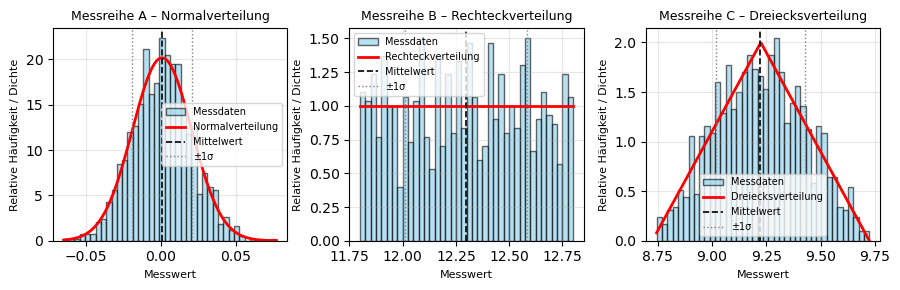

In [37]:
# --------------------------------------------------------------
# 2. Visualisierung mit Theorie, Mittelwert und Standardabweichung
# --------------------------------------------------------------

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharey=False)

# Mittelwerte und Standardabweichungen aus der Statistik
stats = [
    (data_normal, meanA, sA, "Messreihe A – Normalverteilung"),
    (data_rect,   meanB, sB, "Messreihe B – Rechteckverteilung"),
    (data_tri,    meanC, sC, "Messreihe C – Dreiecksverteilung")
]

for ax, (data, mean, std, title) in zip(axes, stats):
    # Histogramm der Messdaten
    counts, bins, _ = ax.hist(
        data,
        bins=40,
        density=True,
        color="skyblue",
        edgecolor="black",
        alpha=0.6,
        label="Messdaten"
    )
    
    # x-Achse für theoretische Dichte
    x = np.linspace(min(data), max(data), 400)
    
    # Theoretische Verteilungen
    if "Normal" in title:
        pdf = norm.pdf(x, loc=mean, scale=std)
        ax.plot(x, pdf, "r-", lw=2, label="Normalverteilung")
    
    elif "Rechteck" in title:
        a = true_angle - delta/2
        b = true_angle + delta/2
        pdf = uniform.pdf(x, loc=a, scale=(b - a))
        ax.plot(x, pdf, "r-", lw=2, label="Rechteckverteilung")
    
    elif "Dreiecks" in title:
        a = 0.5*(true_angle+0.5*true_angle) - delta/2
        b = 0.5*(true_angle+0.5*true_angle) + delta/2
        c = 0.5  # Symmetrische Dreiecksverteilung
        pdf = triang.pdf((x - a) / (b - a), c) / (b - a)
        ax.plot(x, pdf, "r-", lw=2, label="Dreiecksverteilung")
    
    # Linien für Mittelwert und ±1 Standardabweichung
    ax.axvline(mean, color="k", linestyle="--", lw=1.2, label="Mittelwert")
    ax.axvline(mean - std, color="gray", linestyle=":", lw=1, label="±1σ")
    ax.axvline(mean + std, color="gray", linestyle=":", lw=1)
    
    # Layout & Beschriftung
    ax.set_title(title, fontsize=9)
    ax.set_xlabel("Messwert", fontsize=8)
    ax.set_ylabel("Relative Häufigkeit / Dichte", fontsize=8)
    ax.grid(alpha=0.3)
    ax.legend(fontsize=7)

# Gesamtlayout anpassen
plt.tight_layout()
plt.show()

## Angabe der Messergebnisse

Aus der Standardabweichung der Einzelmesswerte lässt sich die **Messunsicherheit des Mittelwertes** ableiten.  
Während die Standardabweichung $s$ die Schwankung der einzelnen Messwerte um den Mittelwert beschreibt, gibt die **Standardunsicherheit des Mittelwertes** $u_{\bar{x}}$ an, mit welcher Genauigkeit der Mittelwert selbst bestimmt ist.  

Da der Mittelwert mit wachsender Anzahl an Messungen stabiler wird, verringert sich seine Unsicherheit mit der Wurzel aus der Stichprobengröße $m$:  

$$
u = \sqrt{G} \cdot \frac{s}{\sqrt{m}}
$$

wobei $G$ der **Verteilungsfaktor** ist, welcher von der Verteilung abhängt

| Verteilung | Beschreibung | Verteilungsfaktor $G$ |
|-------------|---------------|-----------------------|
| Normalverteilung | zufällige Schwankung um Mittelwert |  $G = 1$ |
| Rechteckverteilung | gleichwahrscheinlicher Fehler im Intervall $\pm a$ | $G = 1/3$ |
| Dreiecksverteilung | lineare Abnahme der Wahrscheinlichkeit von der Mitte zum Rand | $G = 1/6$ |

In [38]:
# --------------------------------------------
# 4. Berechnung der Standardunsicherheiten des Mittelwertes
# --------------------------------------------
u_normal_mean = sA / np.sqrt(len(data_normal))
u_rect_mean = sB / np.sqrt(len(data_rect)) / np.sqrt(3)
u_tri_mean = sC / np.sqrt(len(data_tri)) / np.sqrt(6)

print("Berechnete Standardunsicherheiten für den Mittelwert:")
print(f"  u_normal   = {u_normal_mean:.5f}")
print(f"  u_rechteck = {u_rect_mean:.5f} ")
print(f"  u_dreieck  = {u_tri_mean:.5f} ")

Berechnete Standardunsicherheiten für den Mittelwert:
  u_normal   = 0.00057
  u_rechteck = 0.00481 
  u_dreieck  = 0.00241 



Das jeweilige Messergebnis für die drei Messreihen lautet also:

In [39]:
# --------------------------------------------------------------
# 6. Ausgabe der Messergebnisse
# --------------------------------------------------------------

# Experiment A – Normalverteilung
print("Experiment A – Normalverteilung (Sensorrauschen)")
print(f"x̄ = {meanA:.5f} ± {u_normal_mean:.5f}  [Einheit]\n")

# Experiment B – Rechteckverteilung
print("Experiment B – Rechteckverteilung (Encoder)")
print(f"x̄ = {meanB:.5f} ± {u_rect_mean:.5f}  [Einheit]\n")

# Experiment C – Dreiecksverteilung
print("Experiment C – Dreiecksverteilung (zwei Quantisierungen)")
print(f"x̄ = {meanC:.5f} ± {u_tri_mean:.5f}  [Einheit]\n")

print("Hinweis: Die angegebenen Unsicherheiten entsprechen den Standardunsicherheiten (1σ-Niveau).")

Experiment A – Normalverteilung (Sensorrauschen)
x̄ = 0.00077 ± 0.00057  [Einheit]

Experiment B – Rechteckverteilung (Encoder)
x̄ = 12.29736 ± 0.00481  [Einheit]

Experiment C – Dreiecksverteilung (zwei Quantisierungen)
x̄ = 9.22318 ± 0.00241  [Einheit]

Hinweis: Die angegebenen Unsicherheiten entsprechen den Standardunsicherheiten (1σ-Niveau).


* **A**: Die Unsicherheit für den Ruhezustand des Beschleunigungssensors ist verglichen zum Messwert recht hoch und beträgt 74\%, welche ausschließlich auf zufällige 
Messunsicherheiten zurückzuführen sind, da der Mittelwert nah an 0,0 (Ruhezustand) liegt. Ein Offset oder systematischer Fehler ist nicht zu beobachten. 

* **B und CC**: Die begrenzte Auflösung von 0,01 Einheiten hat zur Folge, dass nicht beliebig hoch-aufgelöste Messwerte zur Verfügung stehen (sondern in 0,01er Schritten). Doch trotzdem konnte eine Messunsicherheit in beiden Experimenten erreicht werden, welche einen Faktor 2 bzw. 4 unterhalb der Messgeräte-Auflösung liegt. Das liegt daran, dass aufgrund zufälliger Schwankungen (Rauschen) die Messwerte zwischen benachbarten Quantisierungsstufen (Auflösungsstufen) immer hin und her springen. Wird über viele Messungen gemittelt, ergibt sich ein Mittelwert zwischen diesen Stufen und die effektive Auflösung steigt. Dieser Effekt entspricht dem Prinzip des *Dithering*, bei dem zufällige Schwankungen gezielt genutzt werden, um Quantisierungsfehler zu mitteln und die Genauigkeit digitaler Messsysteme zu erhöhen.
